In [1]:
import os
import numpy as np
from main import *

In [2]:
path = ''
all_implement(path)


NearestNeighbors()


In [6]:
bool([True, True])

True

In [3]:
dataset = display_data_vector_available()[2]
set_up_model("CNN", "mobile_net")

In [4]:
#train_knn(dataset, verbose=True)
set_up_model("CNN", "efficient_net")
vectoriser(name_database="efficient.csv", verbose=True)

Start create new dataset


KeyboardInterrupt: 

ValueError: <class 'numpy.int32'> is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

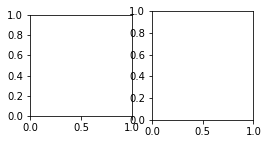

In [5]:
path_dossier_image = "../data/CNN/TEST/8710438110043.jpg"
show_image(path_dossier_image, 8)

In [5]:
set_up_model("CNN", "mobile_net")
#test_performance_cnn()

Start create new dataset
nombre traité: 0
temps d'execution: 0.009007453918457031
nombre traité: 300
temps d'execution: 81.10517978668213
nombre traité: 600
temps d'execution: 160.157808303833
code produit not found : '7'
nombre traité: 900
temps d'execution: 241.00752472877502
code produit not found : '3'
nombre traité: 1200
temps d'execution: 319.5256004333496
nombre traité: 1500
temps d'execution: 397.683641910553
nombre traité: 1800
temps d'execution: 474.46131587028503
nombre traité: 2100
temps d'execution: 549.740216255188
nombre traité: 2400
temps d'execution: 622.998204946518
nombre traité: 2700
temps d'execution: 698.7272567749023
nombre traité: 3000
temps d'execution: 774.4887683391571


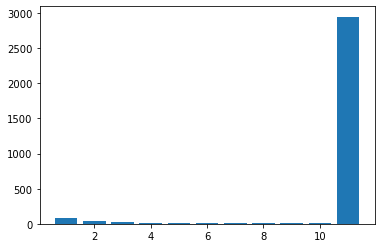

In [6]:
test_performance_cnn(nb_images_test=10, verbose=True)